# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [3]:
# Funktion für Zeitschritt, gibt  [v, x] zurück
def schritt(v, x, dt, a):
    # Neue Geschwindigkeit und Position berechnen
    v += dt * a
    x += dt * v
    # Wert zurückgeben
    return [v, x]
# Werte definieren
v0 = 1
x0 = 2
# arrays initialisieren
v = [v0]
x = [x0]
# Schritte machen
for k in range(4):
    [vtemp, xtemp] = schritt(v[k], x[k], 0.1, -9.81)
    v.append(vtemp)
    x.append(xtemp)

**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von `helpPlotScatter.ipynb`. 

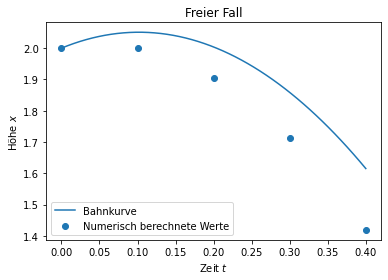

In [6]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
# Plot initialisieren
fig, fall = plt.subplots()
# Beschriftungen
fall.set_title("Freier Fall")
fall.set_xlabel("Zeit $t$")
fall.set_ylabel("Höhe $x$")
# t definieren
t = np.linspace(0, 0.4, 50)
xanalytisch = 2 + t - 9.81 * t ** 2 / 2
# Plots zeichnen
fall.plot(t, xanalytisch, label="Bahnkurve")
fall.scatter(np.linspace(0, 0.4, 5), x, label="Numerisch berechnete Werte")
fall.legend()

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben.

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

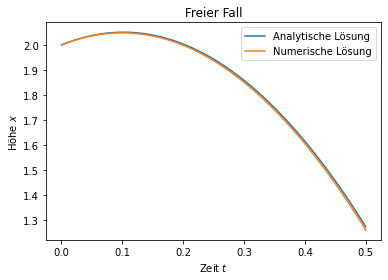

In [31]:
# arrays initialisieren
v = [v0]
x = [x0]
# Schritte machen
for k in range(100):
    [vtemp, xtemp] = schritt(v[k], x[k], 0.005, -9.81)
    v.append(vtemp)
    x.append(xtemp)
# Analytische Werte berechnen
t = np.linspace(0, 0.5, 101)
xanalytisch = 2 + t - 9.81 * t ** 2 / 2
# Plot initialisieren
fig, fall2 = plt.subplots()
# Beschriftungen
fall2.set_title("Freier Fall")
fall2.set_xlabel("Zeit $t$")
fall2.set_ylabel("Höhe $x$")
# Plotten
fall2.plot(t, xanalytisch, label="Analytische Lösung")
fall2.plot(t, x, label="Numerische Lösung")
fall2.legend()

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2 \, .
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

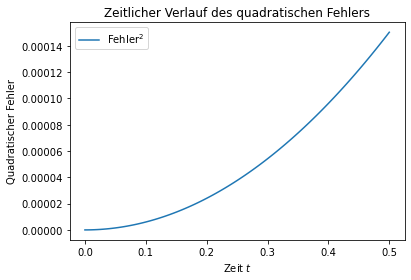

In [32]:
# Plot initialisieren
fig, err = plt.subplots()
# Beschriftungen
err.set_title("Zeitlicher Verlauf des quadratischen Fehlers")
err.set_xlabel("Zeit $t$")
err.set_ylabel("Quadratischer Fehler")
# Plotten
err.plot(t, (xanalytisch -x)**2, label="Fehler$^2$")
err.legend()

Der quadratische Fehler nimmt parabelförmig zu, also nimmt der lineare Fehler wohl linear zu. Das ließe sich durch Halbierung des ersten Zeitschrittes für die Geschwindigkeit korrigieren:

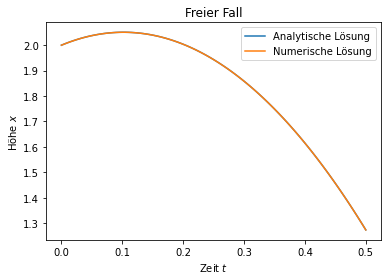

In [43]:
# arrays initialisieren
v = [v0]
x = [x0]
# Erster, halbierter Schritt
[vtemp, xtemp] = schritt(v0, x0, 0.0025, -9.81)
v.append(vtemp)
[vtemp, xtemp] = schritt(v0, x0, 0.005, -9.81)
x.append(xtemp)
# Schritte machen
for k in np.array(range(99)) + 1:
    [vtemp, xtemp] = schritt(v[k], x[k], 0.005, -9.81)
    v.append(vtemp)
    x.append(xtemp)
# Plot initialisieren
fig, fall3 = plt.subplots()
# Beschriftungen
fall3.set_title("Freier Fall")
fall3.set_xlabel("Zeit $t$")
fall3.set_ylabel("Höhe $x$")
# Plotten
fall3.plot(t, xanalytisch, label="Analytische Lösung")
fall3.plot(t, x, label="Numerische Lösung")
fall3.legend()

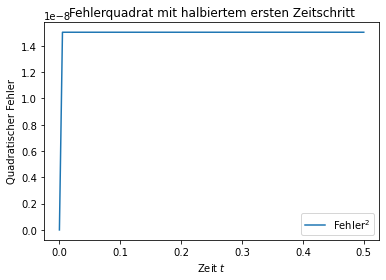

In [44]:
# Plot initialisieren
fig, err2 = plt.subplots()
# Beschriftungen
err2.set_title("Fehlerquadrat mit halbiertem ersten Zeitschritt")
err2.set_xlabel("Zeit $t$")
err2.set_ylabel("Quadratischer Fehler")
# Plotten
err2.plot(t, (xanalytisch - x)**2, label="Fehler$^2$")
err2.legend()

der Fehler ist jetzt sehr viel (Faktor > 1000) kleiner und steigt nicht mehr mit fortschreitender Zeit